<a href="https://colab.research.google.com/github/Naama-shenberger/Big-Data/blob/main/Big_Data_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("rgl", repos = "http://cran.rstudio.com/")
install.packages("ConsRank", repos = "http://cran.rstudio.com/")
library("ConsRank")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘htmlwidgets’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘XML’, ‘rlist’, ‘proxy’, ‘gtools’


Loading required package: rgl

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”

Attaching package: ‘ConsRank’


The following object is masked from ‘package:base’:

    labels




In [ ]:
install.packages("dplyr")
install.packages("tidyr")
install.packages("matrixcalc")
install.packages("zoo")
library(dplyr)
library(tidyr)
library(matrixcalc)
library(zoo)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




[1] "matrix" "array"

$`(20210206,20210207]`
 [1] "2021-02-06 19:00:00" "2021-02-06 20:00:00" "2021-02-06 21:00:00"
 [4] "2021-02-06 22:00:00" "2021-02-06 23:00:00" "2021-02-07 00:00:00"
 [7] "2021-02-07 01:00:00" "2021-02-07 02:00:00" "2021-02-07 03:00:00"
[10] "2021-02-07 04:00:00" "2021-02-07 05:00:00" "2021-02-07 06:00:00"
[13] "2021-02-07 07:00:00" "2021-02-07 08:00:00" "2021-02-07 09:00:00"
[16] "2021-02-07 10:00:00" "2021-02-07 11:00:00" "2021-02-07 12:00:00"
[19] "2021-02-07 13:00:00" "2021-02-07 14:00:00" "2021-02-07 15:00:00"
[22] "2021-02-07 16:00:00" "2021-02-07 17:00:00" "2021-02-07 18:00:00"

$`(20210207,20210208]`
 [1] "2021-02-07 19:00:00" "2021-02-07 20:00:00" "2021-02-07 21:00:00"
 [4] "2021-02-07 22:00:00" "2021-02-07 23:00:00" "2021-02-08 00:00:00"
 [7] "2021-02-08 01:00:00" "2021-02-08 02:00:00" "2021-02-08 03:00:00"
[10] "2021-02-08 04:00:00" "2021-02-08 05:00:00" "2021-02-08 06:00:00"
[13] "2021-02-08 07:00:00" "2021-02-08 08:00:00" "2021-02-08 09:00:00"
[16] "2021-02-08 10:00:00" "20

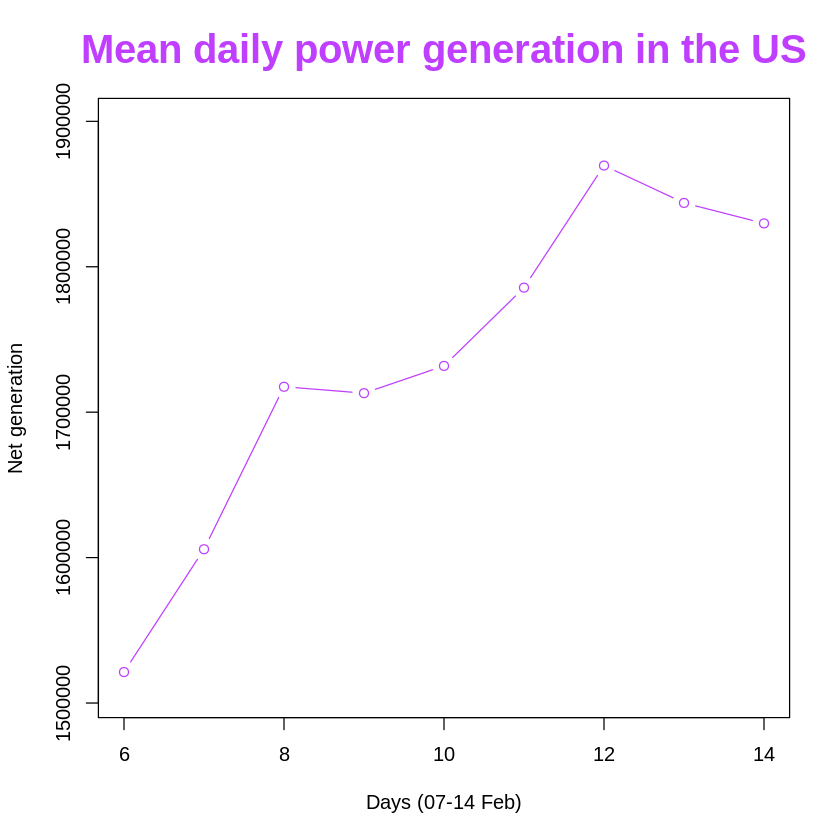

In [ ]:

#Reading Data
A <- read.delim("/content/table.tsv")
A$DateTime <- as.POSIXct( A$megawatthours, tz = "EST", "%H:%M EST %m/%d/%Y" )
# Remove duplicate rows in the dataframe
A<-distinct(A)

# The dimensions of the cube are the districts (each net.number is a district) and the dimension of date time.
data_cube<- with(A,cbind(BPAT=Net.generation,CISO	=Net.generation.1, CPLE=Net.generation.2,ERCO= Net.generation.3, FPL=Net.generation.4,ISNE= Net.generation.5,MISO= Net.generation.6,
                         NYIS =Net.generation.7 , PACW=Net.generation.8 , PJM=Net.generation.9 ,United_States_Lower = Net.generation.10,Date=as.integer(format(as.Date(A[,'DateTime']), "%Y%m%d"))))

#Performing Slicing on Data cube - from all days to 07-14 Feb only.
index<-which(A[,'DateTime']>as.character.POSIXt("2021-02-06") & A[,'DateTime']<as.character.POSIXt("2021-02-15") )
Silce_cube<-data_cube[index,]

class(Silce_cube)

#Performing roll up - from a days and hours to days only.
up <- cut(as.integer(format(Silce_cube[,'Date'])),
          as.integer(format(as.Date(c(seq(as.Date("2021-02-06"),to=as.Date("2021-02-14"),by="days"))), "%Y%m%d")),
          dig.lab = 5)
up.group <- split(format(A[index,'DateTime']), up )
n.decade_levels <- length(up.group)
print (up.group)


data_cube<-na.locf(na.locf(data_cube),fromLast=TRUE)

temp<-data_cube[index,]

rownames(temp) <- c(temp[,"Date"])
temp<-temp[,colnames(temp)!="Date"]

roll_up <-  rowsum(temp,row.names(temp))
mean<-rowMeans(roll_up[,1:11])


D_f<-tibble(mean)
Days_<- as.integer(substr(names(roll_up[,1]), nchar(names(roll_up[,1])) - 2 + 1, nchar(names(roll_up[,1]))) )
# create an empty plot
plot(1, type="n", xlab="", ylab="", xlim = c(Days_[1],Days_[9]), ylim=c(1505748 ,1900000 ))
# rearrange in a new, temporary dataframe
DF <- data.frame ( Time = Days_, Demand = D_f)
# plot
lines( DF, col = 'darkorchid1', type = 'b' )
title(main = "Mean daily power generation in the US",
      xlab = "Days (07-14 Feb)", ylab = "Net generation",
      cex.main = 2,   font.main = 2, col.main = "darkorchid1")



